<a href="https://colab.research.google.com/github/sudharshanpaul/Machine-Learning/blob/main/EDA/Outlier_Treatment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Outlier Treatment


## 3-Sigma Technique (Standard Deviation)
Anything beyond +3 or -3 is created as an **Outlier**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import seaborn as sns

It is a hypothetical case because all the data is not in Normal distribtion ...

In [ ]:
data = pd.read_csv('/content/raw_sales.csv')

In [ ]:
data.head(5)

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3


In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
# Function to detect Outlier on one-dimensional dataset

def find_anomalies(data):
  # define a list to accumulate anomalies
  anomalies = []

  #Set upper and lower limit to 3 Standard deviations
  random_data_std = statistics.stdev(data)
  random_data_mean = statistics.mean(data)

  anomaly_cut_off = random_data_std * 3

  lower_limit = random_data_mean - anomaly_cut_off
  upper_limit = random_data_mean + anomaly_cut_off

  for outlier in data:
    if( outlier > upper_limit or outlier < lower_limit):
      anomalies.append(outlier)

  return anomalies

In [ ]:
data.price

,price
0,525000
1,290000
2,328000
3,380000
4,310000
...,...
29575,500000
29576,560000
29577,464950
29578,589000


In [ ]:
list_1 = find_anomalies(data.price)

In [ ]:
len(list_1)

461

There are 461 anomalies in the price column

In [ ]:
len(data)

29580

In [ ]:
len(list_1)*100/len(data)

1.5584854631507776

1.55 % is beyod the range of the sigma
we kow that for the normal distribution it is just .3% .So we can say this data is not fully normally distributed

In [ ]:
data.price.skew()

4.312009366902366

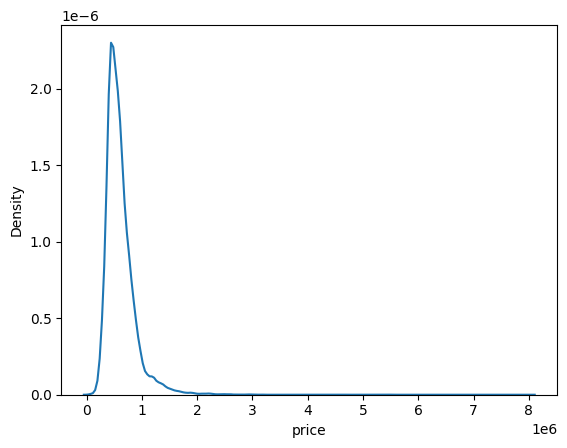

In [ ]:
_= sns.kdeplot(data.price)

In [ ]:
data['price_transformed'] = np.log(data.price)

In [ ]:
data.price_transformed.skew()

0.4731646269984763

Now it is close to zero

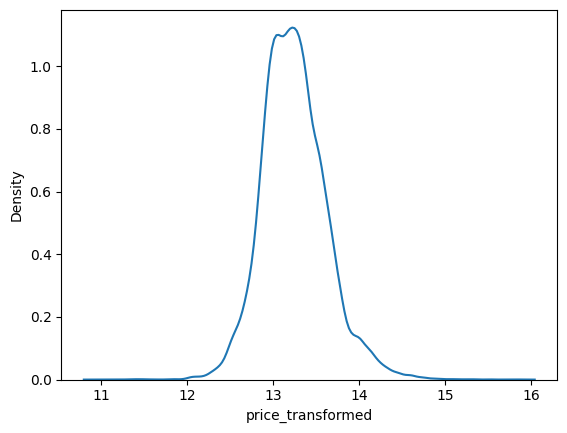

In [ ]:
_= sns.kdeplot(data.price_transformed)

In [ ]:
list_2 = find_anomalies(data.price_transformed)

In [ ]:
len(list_2)

266

In [ ]:
len(list_2)*100/len(data)

0.8992562542258282

In [ ]:
data['price_transformed_double'] = np.log(data.price_transformed)

In [ ]:
data.price_transformed_double.skew()

0.33092530655758573

In [ ]:
list_3 = find_anomalies(data.price_transformed_double)

In [ ]:
len(list_3)

251

In [ ]:
len(list_3)*100/len(data)

0.8485463150777552

## Boxplot
It's a visual way of identifying the outliers

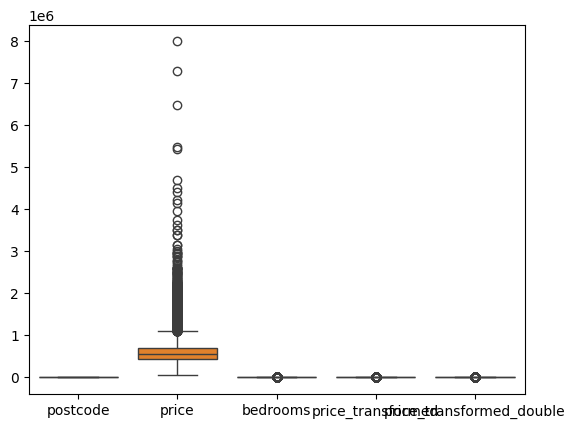

In [ ]:
_=sns.boxplot(data=data)

<Axes: ylabel='price'>

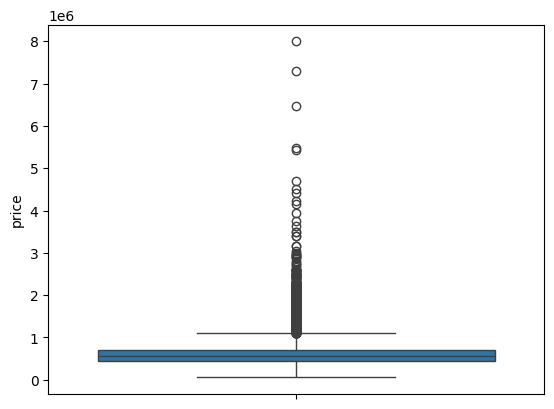

In [ ]:
sns.boxplot(data.price)

In [ ]:
df = pd.DataFrame(data)

In [ ]:
len(df)

29580

In [ ]:
df.describe()

,postcode,price,bedrooms,price_transformed,price_transformed_double
count,29580.000000,2.958000e+04,29580.000000,29580.000000,29580.000000
mean,2730.249730,6.097363e+05,3.250169,13.244695,2.583199
std,146.717292,2.817079e+05,0.951275,0.375214,0.028183
min,2600.000000,5.650000e+04,0.000000,10.941996,2.392608
25%,2607.000000,4.400000e+05,3.000000,12.994530,2.564529
50%,2615.000000,5.500000e+05,3.000000,13.217674,2.581555
75%,2905.000000,7.050000e+05,4.000000,13.465953,2.600165
max,2914.000000,8.000000e+06,5.000000,15.894952,2.766002


## Inter_Quartile Range
**IQR - Q3 - Q1**

In [ ]:
list1 = [43, 54, 56, 61, 62, 66, 68, 69, 69, 70, 71, 72, 77, 78, 79, 85, 87, 88, 89, 93, 95, 96, 98, 99, 99]

In [ ]:
len(list1)

25

In [ ]:
max(list1)

99

In [ ]:
min(list1)

43

In [ ]:
statistics.mean(list1)

76.96

In [ ]:
sorted(list1)

[43,
 54,
 56,
 61,
 62,
 66,
 68,
 69,
 69,
 70,
 71,
 72,
 77,
 78,
 79,
 85,
 87,
 88,
 89,
 93,
 95,
 96,
 98,
 99,
 99]

TO find the 90 percentile for these scores,start by multiplying 90 percent times the total number of scores, which gives 90% * 25 = 0.90 * 25 = 22.5

In [ ]:
list2 = sorted(list1)

In [ ]:
list2[22]

98

Here, 98 is the 90th percentile of this datset

now say you want to find the 20th percentile... 0.2 * 25 = 5. this is a whole number which tells 20th percentile is average of 5th and 6th values in the orderd data

In [ ]:
(list2[4]+list2[5])/2

64.0

The median (the 50th percentile) for the test scores is the 13th score: 77.